In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import plotly.colors as colors
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pickle

In [2]:
df = pd.read_csv('upi_fraud_dataset.csv')
df

,Unnamed: 0,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,0,0,1,1,2022,12,9957000001,54,66.21,22,49879,0
1,1,1,1,1,2022,3,9957000002,15,55.81,14,62668,0
2,2,3,1,1,2022,8,9957000003,60,8.68,4,96037,0
3,3,6,1,1,2022,4,9957000004,44,89.52,40,29911,0
4,4,6,1,1,2022,0,9957000005,72,1.90,38,16421,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2661,2661,16,4,7,2022,13,7662001080,56,3.49,10,31561,0
2662,2662,18,4,7,2022,5,7662001081,61,116.09,35,43330,0
2663,2663,19,4,7,2022,11,7662001082,61,885.19,1,36009,1
2664,2664,19,4,7,2022,10,7662001083,73,1.37,43,76631,0


In [3]:
df.isnull().sum()

Unnamed: 0      0
trans_hour      0
trans_day       0
trans_month     0
trans_year      0
category        0
upi_number      0
age             0
trans_amount    0
state           0
zip             0
fraud_risk      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2666 non-null   int64  
 1   trans_hour    2666 non-null   int64  
 2   trans_day     2666 non-null   int64  
 3   trans_month   2666 non-null   int64  
 4   trans_year    2666 non-null   int64  
 5   category      2666 non-null   int64  
 6   upi_number    2666 non-null   int64  
 7   age           2666 non-null   int64  
 8   trans_amount  2666 non-null   float64
 9   state         2666 non-null   int64  
 10  zip           2666 non-null   int64  
 11  fraud_risk    2666 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 250.1 KB


In [5]:
df.describe()

,Unnamed: 0,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.0,2666.000000,2.666000e+03,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,1332.501500,13.383721,13.552138,3.868717,2022.0,6.800075,8.045540e+09,46.098275,329.844299,27.153788,48219.701800,0.591898
std,769.753574,8.669769,10.316915,3.198150,0.0,3.826561,1.027994e+09,18.863370,385.964247,14.084107,26617.172444,0.491574
min,0.000000,0.000000,1.000000,1.000000,2022.0,0.000000,6.900000e+09,14.000000,1.020000,0.000000,1330.000000,0.000000
25%,666.250000,3.000000,3.000000,2.000000,2022.0,4.000000,7.086000e+09,31.000000,20.987500,15.000000,25132.750000,0.000000
50%,1332.500000,15.000000,15.000000,3.000000,2022.0,7.000000,7.662001e+09,45.000000,113.255000,29.000000,48088.000000,1.000000
75%,1998.750000,22.000000,23.000000,5.000000,2022.0,11.000000,9.101000e+09,58.000000,715.187500,38.000000,68881.000000,1.000000
max,2665.000000,23.000000,31.000000,12.000000,2022.0,13.000000,9.957000e+09,94.000000,3413.050000,50.000000,99783.000000,1.000000


In [6]:
features =  df[['trans_hour','trans_day', 'trans_month', 'trans_year', 'category', 'upi_number', 'age', 'trans_amount', 'state', 'zip']]
target = df['fraud_risk']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 200, test_size = 0.15)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2266, 10)
(400, 10)
(2266,)
(400,)


In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
def train_and_evaluate_models(x_train_scaled, y_train, x_test_scaled, y_test):
    models_list = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        HistGradientBoostingClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        GaussianNB()
    ]

    for model in models_list:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy of the {model} model: {accuracy:.2f}")
        print(f"Precision of the {model} model: {precision:.2f}")
        print(f"Recall of the {model} model: {recall:.2f}")
        print(f"F1-score of the {model} model: {f1:.2f}")
        print('\n ________________________________________________ \n')

In [10]:
train_and_evaluate_models(x_train_scaled, y_train, x_test_scaled, y_test)

Accuracy of the LogisticRegression() model: 0.79
Precision of the LogisticRegression() model: 0.90
Recall of the LogisticRegression() model: 0.71
F1-score of the LogisticRegression() model: 0.79

 ________________________________________________ 

Accuracy of the DecisionTreeClassifier() model: 0.95
Precision of the DecisionTreeClassifier() model: 0.96
Recall of the DecisionTreeClassifier() model: 0.97
F1-score of the DecisionTreeClassifier() model: 0.96

 ________________________________________________ 

Accuracy of the HistGradientBoostingClassifier() model: 0.96
Precision of the HistGradientBoostingClassifier() model: 0.95
Recall of the HistGradientBoostingClassifier() model: 0.98
F1-score of the HistGradientBoostingClassifier() model: 0.97

 ________________________________________________ 

Accuracy of the RandomForestClassifier() model: 0.95
Precision of the RandomForestClassifier() model: 0.94
Recall of the RandomForestClassifier() model: 0.97
F1-score of the RandomForestClassi

### **From the above results its very clear that**
- **DecisionTreeClassifier**, 
- **HistGradientBoostingClassifier**, 
- **RandomForestClassifier**, 
- **GradientBoostingClassifier**
- **AdaBoostClassifier** 

**are more accurate than the other models with their accuracy greater than 90%. So I will be increasing their performance with the help of Hyperparameter tuning** 

In [11]:
# Define the parameter grids for each model
param_grid_decision_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_hist_gradient_boosting = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_leaf_nodes':[10, 20, 15],
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

param_grid_gradient_boosting = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

param_grid_ada_boost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Create a dictionary to store the models and their parameter grids
model_param_grid = {
    DecisionTreeClassifier(): param_grid_decision_tree,
    HistGradientBoostingClassifier(): param_grid_hist_gradient_boosting,
    RandomForestClassifier(): param_grid_random_forest,
    GradientBoostingClassifier(): param_grid_gradient_boosting,
    AdaBoostClassifier(): param_grid_ada_boost,
}
results = []
# Perform hyperparameter tuning and evaluate models
for model, param_grid in model_param_grid.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train_scaled, y_train)
    with open(f'best_{model}.pkl', 'wb') as f:  # Open in binary write mode
        pickle.dump(grid_search.best_estimator_, f)
        print(f"Best model for {model} saved successfully!")
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': model, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})
    print(f"Best parameters for {model}: {grid_search.best_params_}")
    print(f"Accuracy of the {model} model: {accuracy:.2f}")
    print(f"Precision of the {model} model: {precision:.2f}")
    print(f"Recall of the {model} model: {recall:.2f}")
    print(f"F1-score of the {model} model: {f1:.2f}")
    print('\n _______________________________________________________________________________________________________________ \n')

Best model for DecisionTreeClassifier() saved successfully!
Best parameters for DecisionTreeClassifier(): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of the DecisionTreeClassifier() model: 0.95
Precision of the DecisionTreeClassifier() model: 0.94
Recall of the DecisionTreeClassifier() model: 0.97
F1-score of the DecisionTreeClassifier() model: 0.95

 _______________________________________________________________________________________________________________ 

Best model for HistGradientBoostingClassifier() saved successfully!
Best parameters for HistGradientBoostingClassifier(): {'learning_rate': 0.2, 'max_depth': 7, 'max_leaf_nodes': 10}
Accuracy of the HistGradientBoostingClassifier() model: 0.97
Precision of the HistGradientBoostingClassifier() model: 0.96
Recall of the HistGradientBoostingClassifier() model: 0.99
F1-score of the HistGradientBoostingClassifier() model: 0.97

 ________________________________________________________________________

## Summary of Hyperparameter Tuning Results
Hyperparameter Tuning is a technique used to optimize the performance of machine learning models by systematically exploring different combinations of hyperparameters. In this case, we tuned several popular classification models: Decision Tree, HistGradientBoosting, Random Forest, Gradient Boosting, and AdaBoost.

Model Performance:

1. Decision Tree:
    - Best Parameters: max_depth=10, min_samples_leaf=1, min_samples_split=5
    - Performance: Achieved an accuracy of 0.95, indicating strong performance.
    
2. HistGradientBoosting:
    - Best Parameters: learning_rate=0.2, max_depth=7, max_leaf_nodes=10
    - Performance: Outperformed other models with an accuracy of 0.97 and excellent recall of 0.99.
    
3. Random Forest:
    - Best Parameters: max_depth=None, min_samples_split=2, n_estimators=100
    - Performance: Achieved an accuracy of 0.95 and a strong recall of 0.98.
4. Gradient Boosting:
    - Best Parameters: learning_rate=0.05, max_depth=5, n_estimators=100
    - Performance: Showed solid performance with an accuracy of 0.96 and a good recall of 0.98.
    
5. AdaBoost:
    - Best Parameters: learning_rate=0.1, n_estimators=200
    - Performance: Achieved an accuracy of 0.94, slightly lower than other models.

### **Overall, the HistGradientBoosting model demonstrated the best performance in terms of accuracy and recall. This suggests that it is the most suitable model for this specific classification task. **

In [12]:
df_results = pd.DataFrame(results)
#df_results['Model'] = df_results['Model'].str.replace(r'\([^()]*\)', '', regex=True).str.strip()
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(),0.9475,0.940678,0.969432,0.954839
1,HistGradientBoostingClassifier(),0.9700,0.957806,0.991266,0.974249
2,RandomForestClassifier(),0.9500,0.937238,0.978166,0.957265
3,GradientBoostingClassifier(),0.9575,0.949153,0.978166,0.963441
4,AdaBoostClassifier(),0.9350,0.931915,0.956332,0.943966


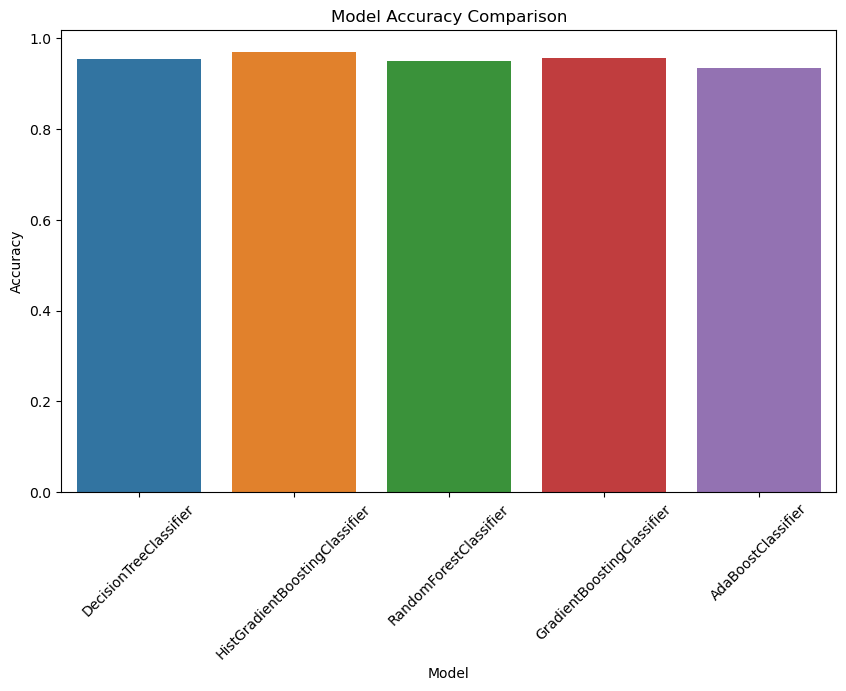

In [13]:
data= {'Model': ['DecisionTreeClassifier', 'HistGradientBoostingClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier'],
        'Accuracy': [0.955, 0.97, 0.95, 0.9575, 0.935]}
df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy',data=df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

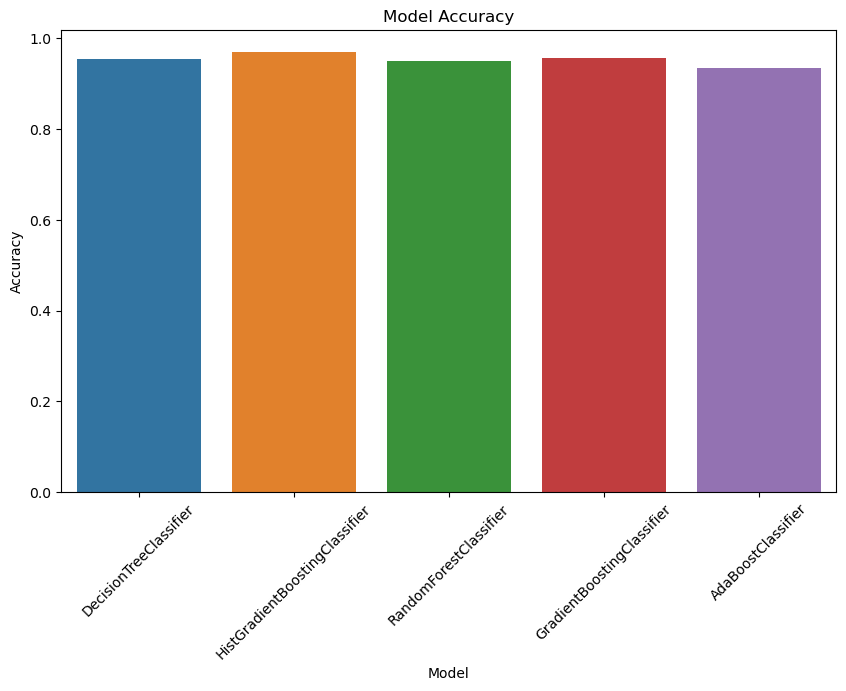

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.show()